In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import pickle
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Comprensión empresarial

Los depósitos a largo plazo permiten a los bancos retener dinero durante un período de tiempo específico, lo que permite al banco utilizar ese dinero para mejorar sus inversiones. Las campañas de marketing de este producto se basan en llamadas telefónicas. Si un usuario no se encuentra disponible en un momento dado, entonces se le volverá a llamar de nuevo en otro momento.

Descripción del problema

El banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.

Para abordar este problema crearemos un algoritmo de clasificación que ayude a predecir si un cliente contratará o no un depósito a largo plazo.

In [3]:
df = pd.read_csv('/workspaces/Antonio27M-machine-learning/data/raw/bank-marketing-campaign-data.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- age. Edad del cliente (numérico)

- job. Tipo de trabajo (categórico)

- marital. Estado civil (categórico)

- education. Nivel de educación (categórico) 

- default. ¿Tiene crédito actualmente? (categórico) / FUERA

- housing. ¿Tiene un préstamo de vivienda? (categórico)

- loan. ¿Tiene un préstamo personal? (categórico)

- contact. Tipo de comunicación de contacto (categórico) /FUERA

- month. Último mes en el que se le ha contactado (categórico) 

- day_of_week. Último día en el que se le ha contactado (categórico)

- duration. Duración del contacto previo en segundos (numérico) / FUERA

- campaign. Número de contactos realizados durante esta campaña al cliente (numérico) 

- pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico) / FUERA

- previous. Número de contactos realizados durante la campaña anterior al cliente (numérico) /FUERA

- poutcome. Resultado de la campaña de marketing anterior (categórico) / FUERA

- emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)

- cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)

- cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico) 

- euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico) 

- nr.employed. Número de empleados. Indicador trimestral (numérico) 

- y. TARGET. El cliente contrata un depósito a largo plazo o no (categórico) 


In [5]:
df.drop_duplicates()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
df['housing'].value_counts()

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [8]:
df_factorize = df.copy()

In [9]:
df_factorize['number_y'] = pd.factorize(df['y'])[0]
df_factorize['number_job'] = pd.factorize(df['job'])[0]
df_factorize['number_marital'] = pd.factorize(df['marital'])[0]
df_factorize['number_education'] = pd.factorize(df['education'])[0]
df_factorize['number_default'] = pd.factorize(df['default'])[0]
df_factorize['number_housing'] = pd.factorize(df['housing'])[0]
df_factorize['number_loan'] = pd.factorize(df['loan'])[0]
df_factorize['number_month'] = pd.factorize(df['month'])[0]
df_factorize['number_contact'] = pd.factorize(df['contact'])[0]
df_factorize['number_day_of_week'] = pd.factorize(df['day_of_week'])[0]
df_factorize['number_poutcome'] = pd.factorize(df['poutcome'])[0]


In [10]:
df_numerico = df_factorize.select_dtypes(include=['number'])

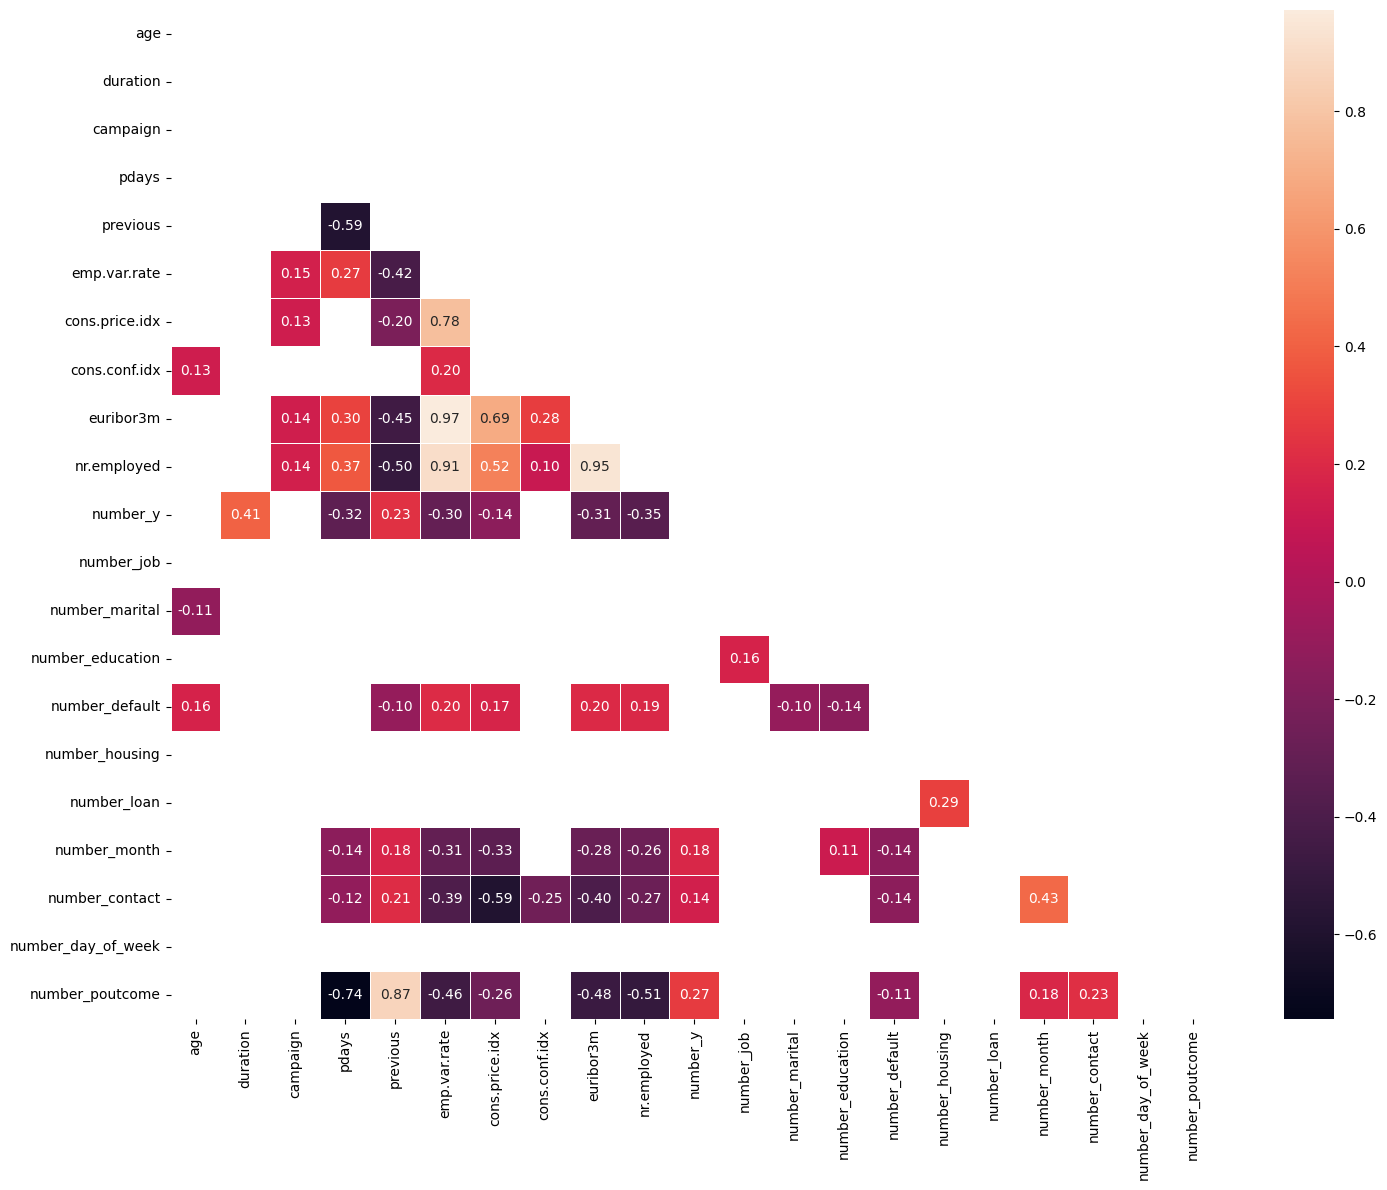

In [11]:

corr = df_numerico.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
significant_corr = corr[abs(corr) > 0.1]
significant_corr
fig, axis = plt.subplots(figsize=(15, 12))
sns.heatmap(significant_corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")
plt.tight_layout()
plt.show()

### Observaciones: 

- nr_employed se elimina por tener una correlacion 0.91 y 0.95
- emp_var_rate se elimina por tener una correlacion con mas de tres variables. (0.91, 0.97, 0.78)
- number_potcome se elimina por tener una correlacion -0.74 y 0.87.

In [12]:
df_num_dos = df_numerico.drop(columns=['nr.employed', 'emp.var.rate','number_poutcome', 'previous', 'cons.price.idx'])

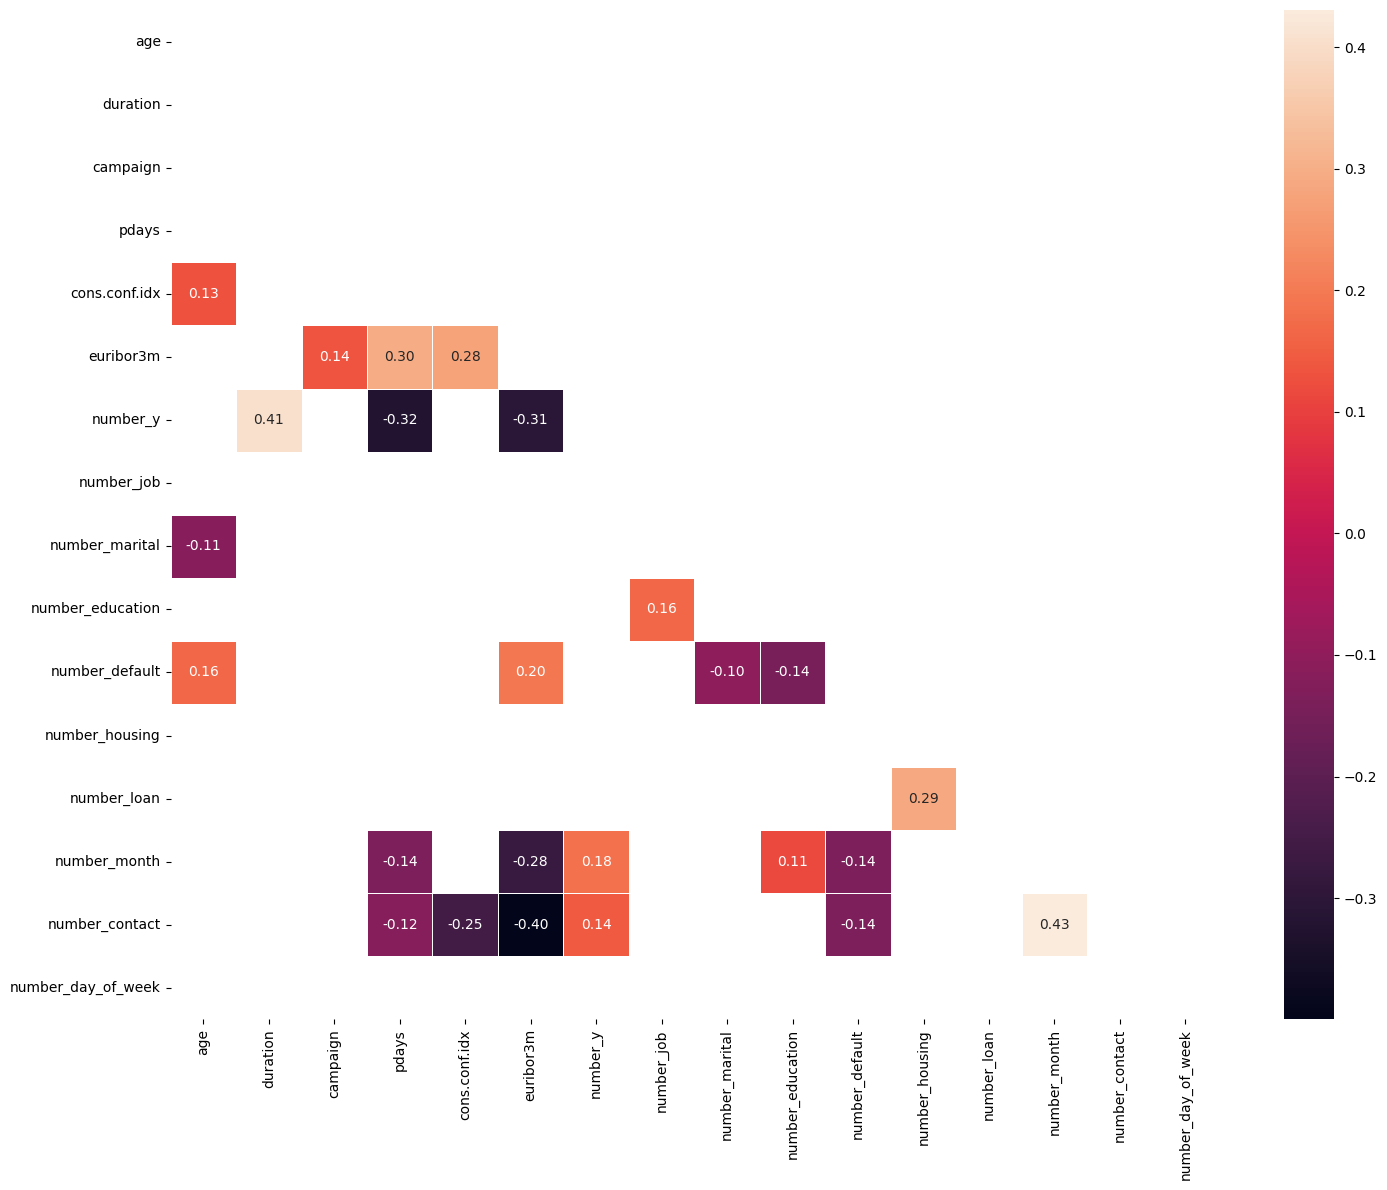

In [13]:
corr = df_num_dos.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
significant_corr = corr[abs(corr) > 0.1]
significant_corr
fig, axis = plt.subplots(figsize=(15, 12))
sns.heatmap(significant_corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")
plt.tight_layout()
plt.show()

In [14]:
''''
for columnas in df:
    fig, axis = plt.subplots(figsize=(20, 7))
    sns.countplot(data=df, x=columnas, hue="y")
    plt.tight_layout()
    plt.show()
'''

'\'\nfor columnas in df:\n    fig, axis = plt.subplots(figsize=(20, 7))\n    sns.countplot(data=df, x=columnas, hue="y")\n    plt.tight_layout()\n    plt.show()\n'

In [15]:
df_drop = df.drop(columns=['nr.employed','emp.var.rate','poutcome','previous','cons.price.idx','default' ])

In [16]:
X = df_drop.drop('y', axis=1)
y = df_drop['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [17]:
df_drop.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'cons.conf.idx', 'euribor3m', 'y'],
      dtype='object')

In [18]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            41188 non-null  int64  
 1   job            41188 non-null  object 
 2   marital        41188 non-null  object 
 3   education      41188 non-null  object 
 4   housing        41188 non-null  object 
 5   loan           41188 non-null  object 
 6   contact        41188 non-null  object 
 7   month          41188 non-null  object 
 8   day_of_week    41188 non-null  object 
 9   duration       41188 non-null  int64  
 10  campaign       41188 non-null  int64  
 11  pdays          41188 non-null  int64  
 12  cons.conf.idx  41188 non-null  float64
 13  euribor3m      41188 non-null  float64
 14  y              41188 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 4.7+ MB


In [19]:
X_train_cat_le = X_train.copy()
X_test_cat_le = X_test.copy()

label_encoder_job = LabelEncoder()
label_encoder_job.fit(X_train['job'])
X_train_cat_le['job_le'] = label_encoder_job.transform(X_train['job']) 
X_test_cat_le['job_le'] = label_encoder_job.transform(X_test['job'])  


label_encoder_marital = LabelEncoder()
label_encoder_marital.fit(X_train['marital'])
X_train_cat_le['marital_le'] = label_encoder_marital.transform(X_train['marital']) 
X_test_cat_le['marital_le'] = label_encoder_marital.transform(X_test['marital'])  

label_encoder_education = LabelEncoder()
label_encoder_education.fit(X_train['education'])
X_train_cat_le['education_le'] = label_encoder_education.transform(X_train['education']) 
X_test_cat_le['education_le'] = label_encoder_education.transform(X_test['education'])  

label_encoder_housing = LabelEncoder()
label_encoder_housing.fit(X_train['housing'])
X_train_cat_le['housing_le'] = label_encoder_housing.transform(X_train['housing']) 
X_test_cat_le['housing_le'] = label_encoder_housing.transform(X_test['housing'])  

label_encoder_loan = LabelEncoder()
label_encoder_loan.fit(X_train['loan'])
X_train_cat_le['loan_le'] = label_encoder_loan.transform(X_train['loan']) 
X_test_cat_le['loan_le'] = label_encoder_loan.transform(X_test['loan'])  

label_encoder_month = LabelEncoder()
label_encoder_month.fit(X_train['month'])
X_train_cat_le['month_le'] = label_encoder_month.transform(X_train['month']) 
X_test_cat_le['month_le'] = label_encoder_month.transform(X_test['month'])  

label_encoder_contact = LabelEncoder()
label_encoder_contact.fit(X_train['contact'])
X_train_cat_le['contact_le'] = label_encoder_contact.transform(X_train['contact'])  
X_test_cat_le['contact_le'] = label_encoder_contact.transform(X_test['contact'])  

label_encoder_day_of_week = LabelEncoder()
label_encoder_day_of_week.fit(X_train['day_of_week'])
X_train_cat_le['day_of_week_le'] = label_encoder_day_of_week.transform(X_train['day_of_week'])  
X_test_cat_le['day_of_week_le'] = label_encoder_day_of_week.transform(X_test['day_of_week'])  


X_train_cat_le.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,cons.conf.idx,euribor3m,job_le,marital_le,education_le,housing_le,loan_le,month_le,contact_le,day_of_week_le
11348,55,retired,married,university.degree,yes,no,telephone,jun,thu,1012,...,-41.8,4.961,5,1,6,2,0,4,1,2
38879,34,management,married,university.degree,no,no,cellular,nov,mon,75,...,-30.1,0.714,4,1,6,0,0,7,0,1
24510,53,housemaid,married,university.degree,no,no,cellular,nov,mon,53,...,-42.0,4.191,3,1,6,0,0,7,0,1
38865,25,admin.,single,unknown,yes,no,telephone,nov,mon,643,...,-30.1,0.714,0,2,7,2,0,7,1,1
25238,36,admin.,married,high.school,yes,no,cellular,nov,tue,722,...,-42.0,4.153,0,1,3,2,0,7,0,3


In [20]:
with open('/workspaces/Antonio27M-machine-learning/models/logistic-regression-label-encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder_job, file)
with open('/workspaces/Antonio27M-machine-learning/models/logistic-regression-label-encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder_marital, file)
with open('/workspaces/Antonio27M-machine-learning/models/logistic-regression-label-encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder_education, file)
with open('/workspaces/Antonio27M-machine-learning/models/logistic-regression-label-encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder_housing, file)
with open('/workspaces/Antonio27M-machine-learning/models/logistic-regression-label-encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder_month, file)
with open('/workspaces/Antonio27M-machine-learning/models/logistic-regression-label-encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder_contact, file)
with open('/workspaces/Antonio27M-machine-learning/models/logistic-regression-label-encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder_day_of_week, file)
with open('/workspaces/Antonio27M-machine-learning/models/logistic-regression-label-encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder_loan, file)

In [21]:
norm_scaler = StandardScaler() 

num_variables = ['age','duration', 'campaign', 'pdays', 'cons.conf.idx', 'euribor3m']

norm_features = norm_scaler.fit_transform(df_drop[num_variables])

df_norm = pd.DataFrame(norm_features, index=df.index, columns=num_variables)
df_norm.head()

,age,duration,campaign,pdays,cons.conf.idx,euribor3m
0,1.533034,0.010471,-0.565922,0.195414,0.886447,0.71246
1,1.628993,-0.421501,-0.565922,0.195414,0.886447,0.71246
2,-0.290186,-0.124520,-0.565922,0.195414,0.886447,0.71246
3,-0.002309,-0.413787,-0.565922,0.195414,0.886447,0.71246
4,1.533034,0.187888,-0.565922,0.195414,0.886447,0.71246


In [22]:
num_variables = ["age", "job_le", "marital_le", "education_le", "loan_le", "contact_le", "month_le", "campaign", "duration", "housing_le"]
norm_features_x_train  = norm_scaler.fit_transform(X_train_cat_le[num_variables])
norm_features_x_test = norm_scaler.fit_transform(X_test_cat_le[num_variables])

X_train_cat_le_scaled = pd.DataFrame(norm_features_x_train,
                       index=X_train_cat_le.index,
                       columns=num_variables)
X_test_cat_le_scaled = pd.DataFrame(norm_features_x_test,
                       index=X_test_cat_le.index,
                       columns=num_variables)
X_test_cat_le_scaled.head()

,age,job_le,marital_le,education_le,loan_le,contact_le,month_le,campaign,duration,housing_le
19829,0.859182,-1.042294,-0.281188,-0.349794,-0.458942,-0.752436,-1.391711,-0.563030,-0.414084,-1.097164
28042,-0.777804,1.463308,1.355863,1.057467,-0.458942,-0.752436,-1.820948,-0.197094,0.139463,0.935087
22342,-0.874098,1.463308,-1.918240,1.057467,-0.458942,-0.752436,-1.391711,-0.197094,-0.449168,0.935087
5229,1.629529,-0.763894,-0.281188,-1.757054,2.281736,1.329017,0.754473,-0.197094,-0.367305,0.935087
25731,-1.066684,0.071307,1.355863,1.057467,-0.458942,-0.752436,1.183710,-0.563030,2.123659,-1.097164


In [23]:
model = LogisticRegression(random_state=18)
model.fit(X_train_cat_le_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,18
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [24]:
X_test_cat_le_scaled.shape

(8238, 10)

In [27]:
y_pred = model.predict(X_test_cat_le_scaled)
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'yes'],
      shape=(8238,), dtype=object)

In [30]:
model_accuracy = accuracy_score(y_test, y_pred)
model_accuracy

0.8957271182325808

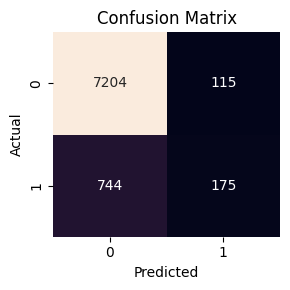

In [ ]:
df_banco = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(df_banco)
plt.figure(figsize=(3, 3))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()